<a href="https://colab.research.google.com/github/onpailin/Image-Processing/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

In [ ]:
!pip install  tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 62.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# io
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create empty lists to store images
image_array = []
image_group = []

# Use glob to search for image files in nested folders
image_files = glob.glob('/content/drive/MyDrive/face_mini.zip (Unzipped Files/**/*.jpg)', recursive=True)

# Loop through image files and group them by 100
for image_file in image_files:
    # Read the image using OpenCV
    image = cv2.imread(image_file)

    # Switch the color channels from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the RGB image to the range [0, 1]
    normalized_image = rgb_image / 255.0

    # Append the normalized image to the current group
    image_group.append(normalized_image)

    # Check if the group has reached 100 images
    if len(image_group) == 100:
        # Append the group to the main array and reset the group
        image_array.append(image_group)
        image_group = []

# Check for any remaining images in the last group
if len(image_group) > 0:
    image_array.append(image_group)


In [ ]:
# Now, image_array contains groups of 100 normalized images each
# Access individual images within each group as needed

# Display the first 10 images from the first 10 groups
for group_index, image_group in enumerate(image_array[:10]):
    for image_index, image in enumerate(image_group):
        if image_index == 0:
            plt.figure(figsize=(5, 5))  # Set the figure size
            plt.imshow(image)  # Display the normalized image
            plt.title(f'Group {group_index + 1}, Image {image_index + 1}')
            plt.axis('off')  # Hide axis
            plt.show()

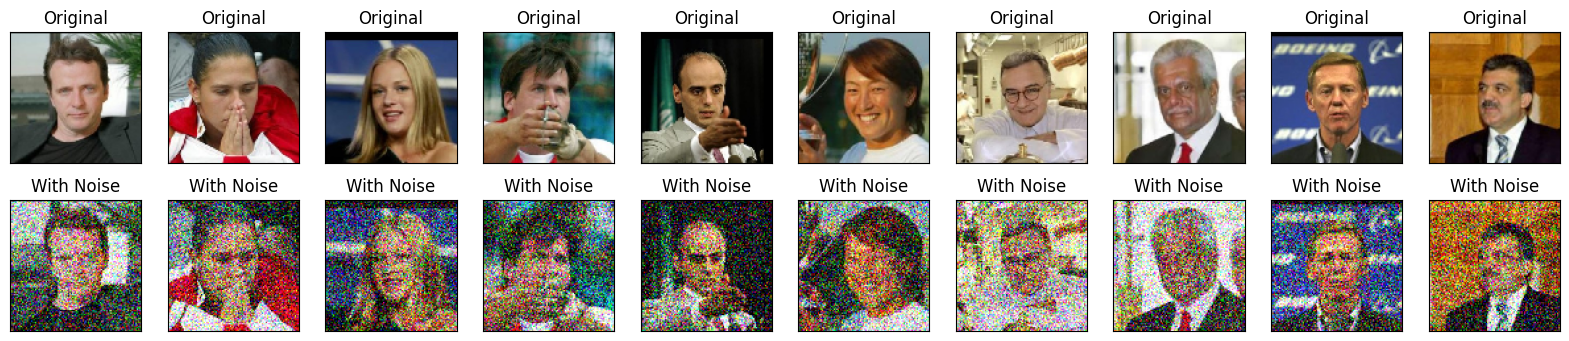

In [ ]:
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. อ่านไฟล์ภาพทั้งหมดเก็บในรูป array
image_files = glob.glob('/content/drive/MyDrive/face_mini/*/*.jpg', recursive=True)  # เปลี่ยน path_to_images เป็นตำแหน่งที่เก็บภาพของคุณ
imgs = []

for fname in image_files:
    img = load_img(fname, target_size=(100, 100), interpolation="nearest")
    img_array = img_to_array(img)
    imgs.append(img_array)

imgs = np.array(imgs)

# # 2. Normalized ภาพ
imgs = imgs / 255.0

# # 3. Append images to an array

 # 4. แบ่งชุดข้อมูลเป็น Training_data, Testing_data (70 : 30)
train_x, test_x = train_test_split(imgs, test_size=0.3, random_state=42)

# # 5. แบ่งชุดข้อมูล Training_data เป็น Training_data, Validation_data (80:20)
train_x, val_x = train_test_split(train_x, test_size=0.2, random_state=42)

# # 6. กาหนด noise parameters
noise_mean = 0
noise_std = 0.3
noise_factor = 1

# # 7. สร้าง noise บวกเพิ่มเข้าในภาพ train_x, val_x, test_x
train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

# # 8. แสดงภาพเปรียบเทียบ ภาพที่เพิ่ม noise และภาพต้นฉบับ
n = 10  # แสดงภาพ 10 รูปเท่านั้น
plt.figure(figsize=(20, 4))
for i in range(n):
    # แสดงภาพต้นฉบับ
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_x[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # แสดงภาพที่เพิ่ม noise
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_x_noise[i])
    plt.title("With Noise")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
